# Qualidade de vinhos branco e tinto 

Datasets obtido do site 
https://archive.ics.uci.edu/ml/datasets/wine+quality

Fonte:

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009

### Parâmetros avaliados
Variaveis de entrada (Valores obtidos por testes físico-quimicos):<br>
1 - Acidez fixa (g(ácido tartárico)/dm³)  <br>
2 - Acidez volatil (g(ácido aceticodm³)<br>
3 - Ácido citrico (g/dm³)<br>
4 - Açucar residual (g/dm³)<br>
5 - Cloretos (g(Cloreto de Sódio)/dm³)<br>
6 - Dióxido de enxofre livre (mg/dm³)<br>
7 - Dióxido de enxofre total(mg/dm³)<br>
8 - Densidade (g/cm³)<br>
9 - pH<br>
10 - Sulfatos (g(Sulfato de potássio/dm³)<br>
11 - Alcool (g/dm³)<br>
12 - Qualidade (Nota entre 0 e 10)

São usados dois datasets, winequality-red e winequality-white.<br>
Cada arquivo será trabalhado individualmente.<br>
Primeiramente será trabalhado o dataset: **winequality-red**


In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import sklearn 
sns.set(style="white")
%matplotlib inline

### Base de dados winequality-red

In [2]:
df_wine_red = pd.read_csv('winequality-red.csv')

In [3]:
# Valores de entrada da base de dados
df_wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Buscando valores faltantes 
df_wine_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Estatistica de cada uma das entradas 
df_wine_red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

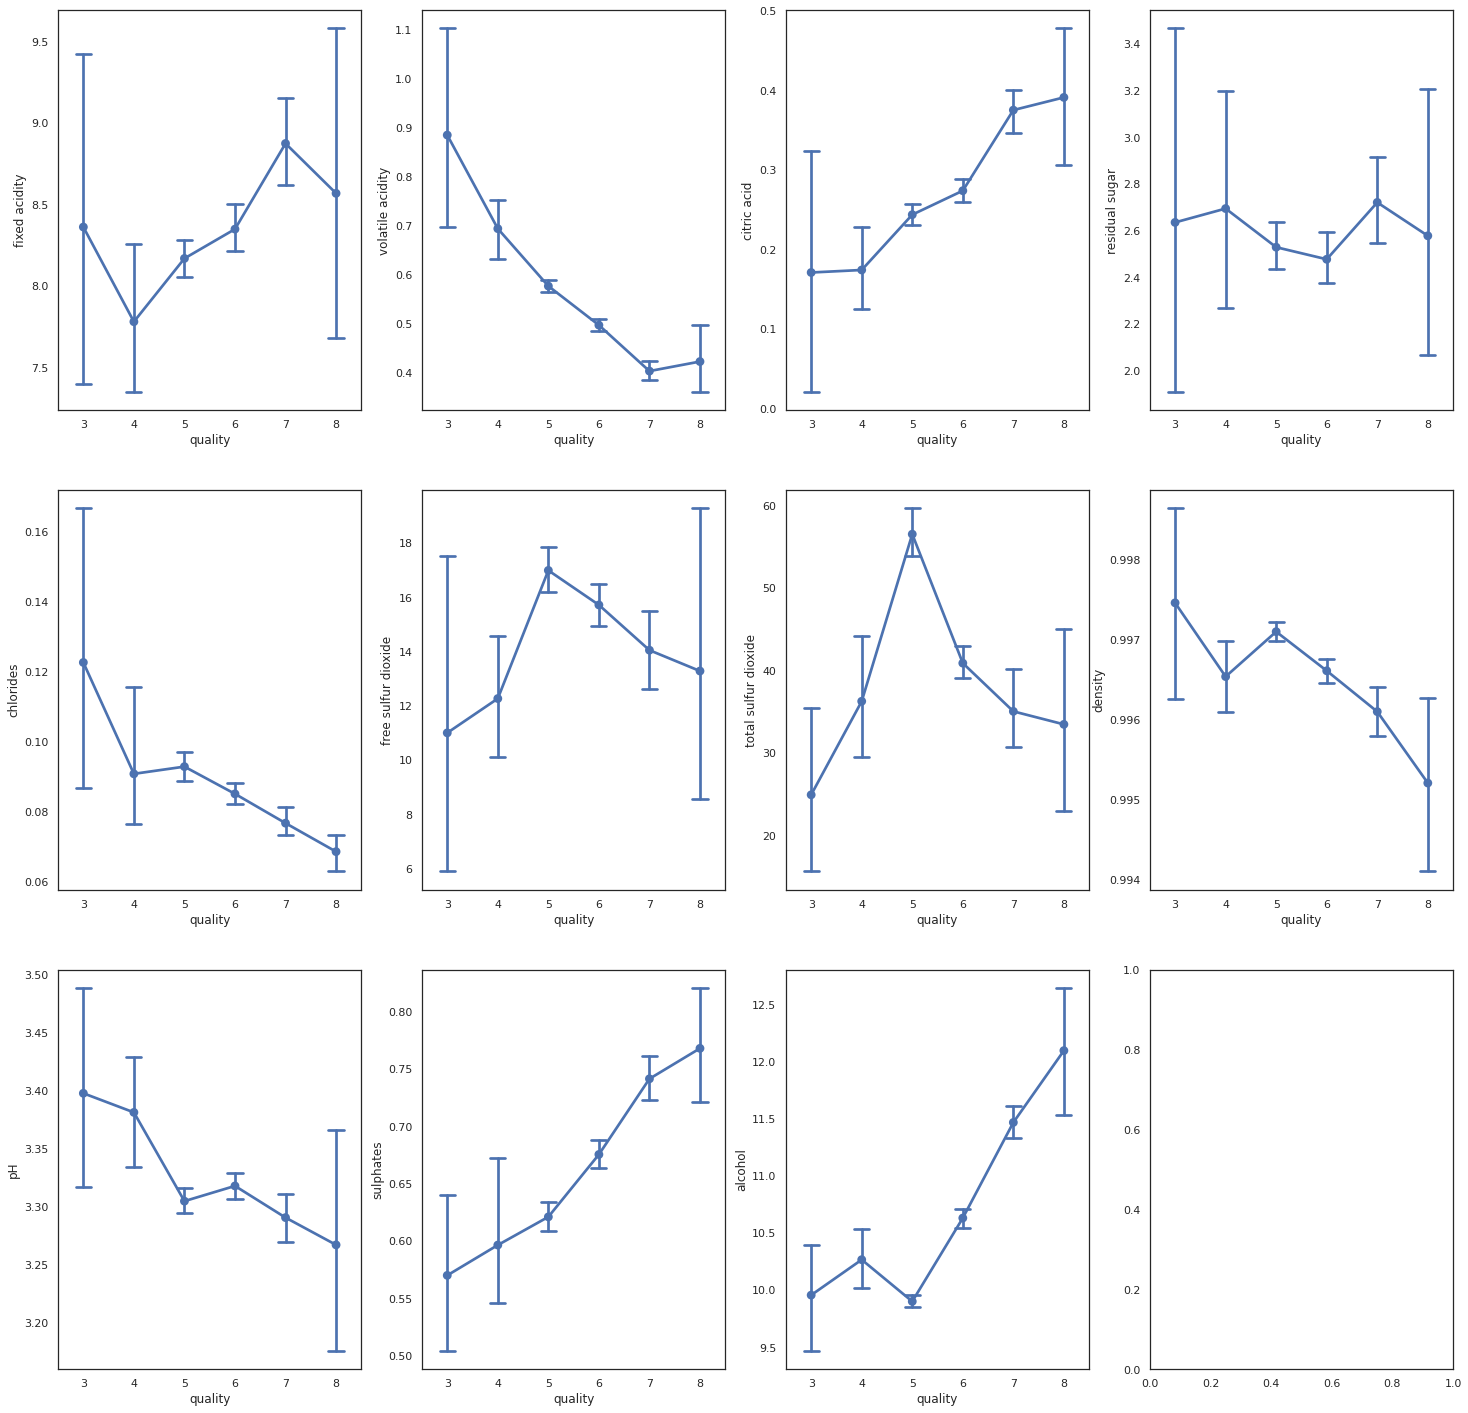

In [6]:
fig,axes= plt.subplots(3,4,figsize=(25,25)  ) 
sns.pointplot(data=df_wine_red, x='quality', y='fixed acidity', ax=axes[0,0],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='volatile acidity', ax=axes[0,1],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='citric acid', ax=axes[0,2],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='residual sugar', ax=axes[0,3],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='chlorides', ax=axes[1,0],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='free sulfur dioxide', ax=axes[1,1],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='total sulfur dioxide', ax=axes[1,2],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='density', ax=axes[1,3],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='pH', ax=axes[2,0],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='sulphates', ax=axes[2,1],capsize=.3)
sns.pointplot(data=df_wine_red, x='quality', y='alcohol', ax=axes[2,2],capsize=.3)


   Em uma primeira analise, olhando esse grafico, podemos presupor a presença de outliers nos pontos referentes a qualidade igual a 3, onde existe uma grande diferença na barra do desvio padrão deste em relação aos outros pontos. 
   
   Analisando sob outro aspecto,vemos o real motivo dessa grande variação entre as medidas para qualidade igual a 3. Temos que o número de dados para Qualidade iguala a 3, 4 e 8. são muito baixos em relação a 5,6 e 7. Logo nossa base de dados se encontra desbalanceada, tornando alguns pontos com maior precisão do que outros.
   Podemos ver isso na linha seguinte.

In [7]:
df_wine_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

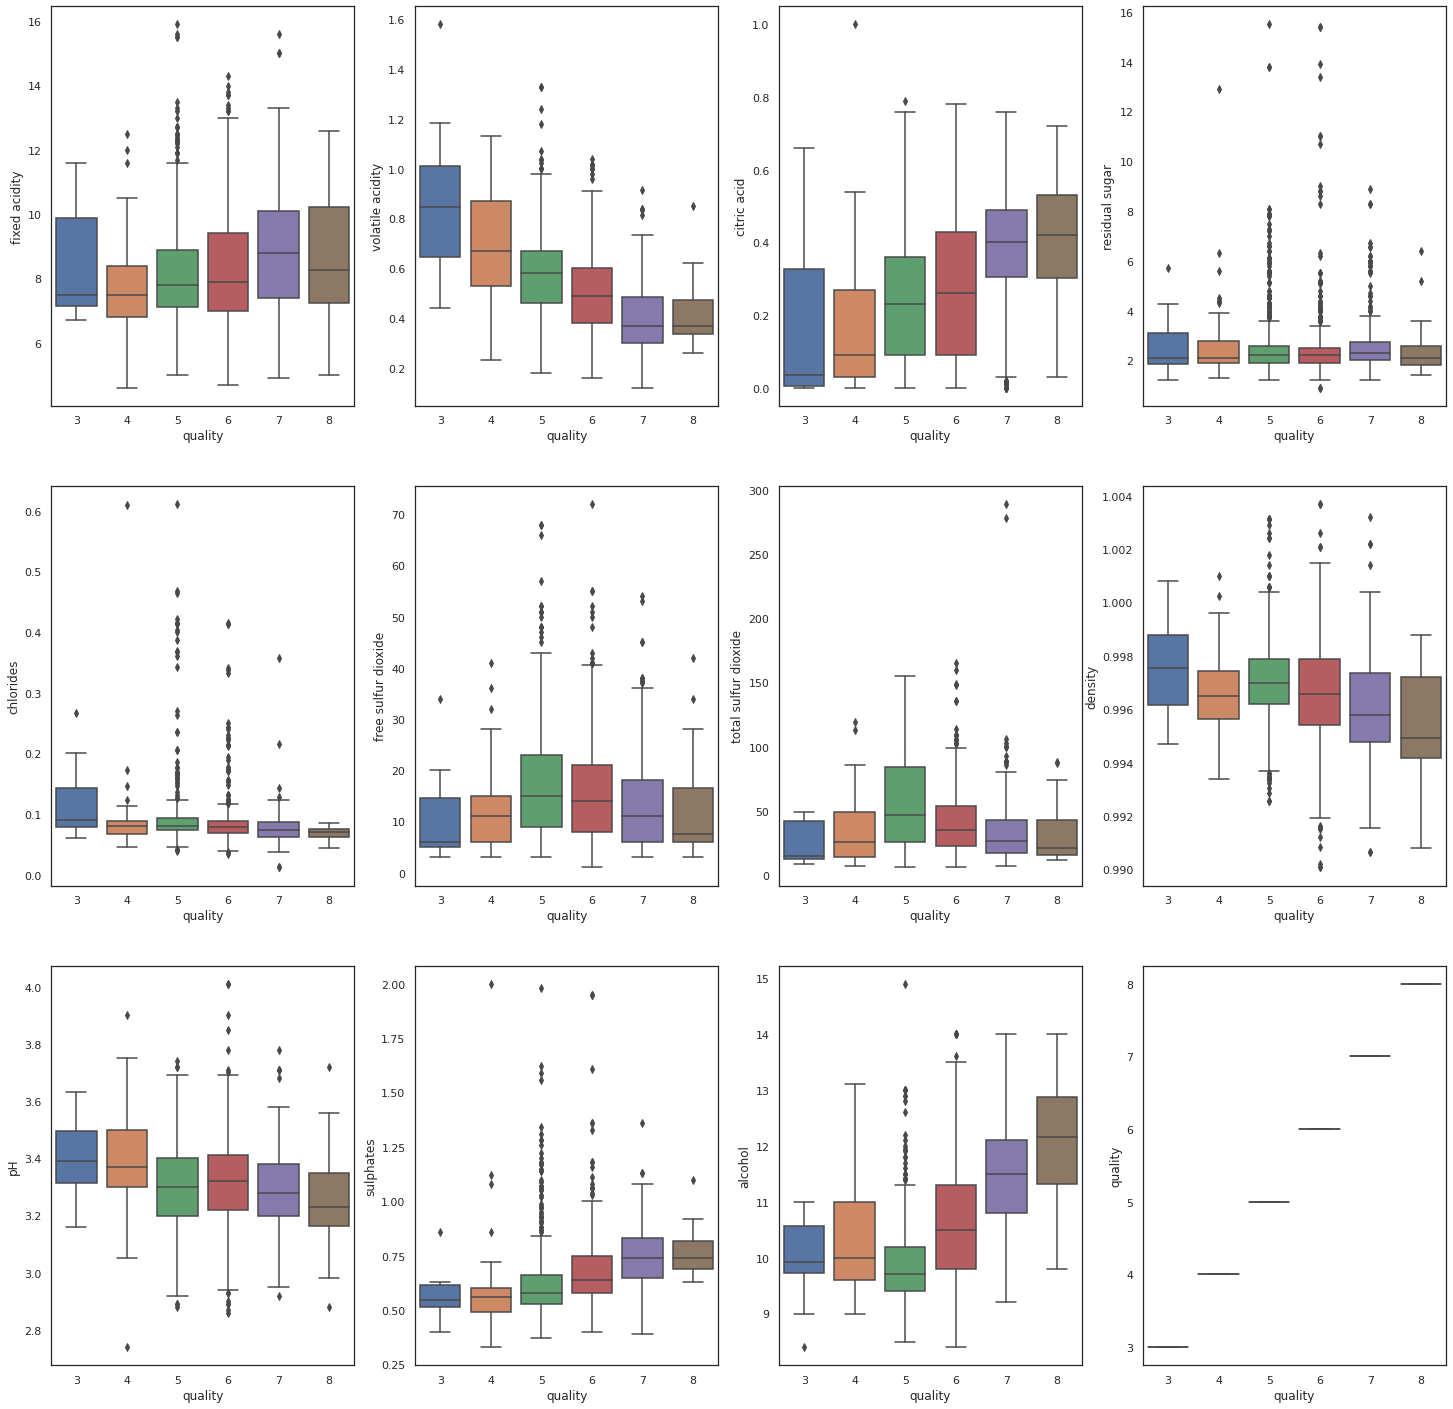

In [8]:
fig,axes= plt.subplots(figsize=(25,25)) 
for i, c in enumerate(df_wine_red, 1):
    plt.subplot(3,4,i) 
    g = sns.boxplot(x='quality', y=c, data=df_wine_red)    

In [33]:
fig = go.Figure()


fig.add_trace(go.Box(x=df_wine_red.quality,y=df_wine_red.pH,
    name="Suspected Outliers",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.update_layout(title_text="Box Plot Styling Outliers")
fig.show()


In [129]:
plot_rows=3
plot_cols=4
fig = make_subplots(rows=plot_rows, cols=plot_cols)

for i in range(1, plot_rows):
    for j in enumerate(df_wine_red,1):
    
        #print(str(i)+ ', ' + str(j))
        fig.add_trace(go.Box(y=df_wine_red['pH'],x=df_wine_red['quality'],
                            ),
                     row=i,
                     col=j)

        
        

# Format and show fig
fig.update_layout(height=1200, width=1200)
fig.show()

ValueError: 
        If specified, the cols parameter must be a list or tuple of integers
        of length 1 (The number of traces being added)

        Received: [(1, 'fixed acidity')]
        

## Regressão 

In [ ]:
x_in = df_wine_red.iloc[:,0:11].values #Separação das variaveis  Eixo X
y_out = df_wine_red.iloc[:,11] #Separação da saida do Eixo y 
x_in.shape, y_out.shape

In [ ]:
y_out = y_out.values.reshape(-1,1) # O y possui uma unica dimensão, por isso é necessario transforma-la em ma matrix
y_out.shape                   # de duas dimensões para ficar no formato de matriz

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_in_train, x_in_test, y_out_train, y_out_test = train_test_split(x_in,y_out,test_size=.2, random_state=0)

In [ ]:
x_in_train.shape, x_in_test.shape,y_out_train.shape,y_out_test.shape

In [ ]:
regression_multiple = LinearRegression()
regression_multiple.fit(x_in_train,y_out_train)

In [ ]:
regression_multiple.intercept_

In [ ]:
regression_multiple.coef_

In [ ]:
regression_multiple.score(x_in_train,y_out_train)

In [ ]:
regression_multiple.score(x_in_test,y_out_test)

**Como podemos ver, este algoritmo não teve uma boa resposta na resolução do problema com um fator de acerto de somente 32.8%**

In [ ]:
word=['F','a','b','r','i','c','i','o']
word

In [ ]:
for i, value in enumerate(word):
    print(i, value)

In [ ]:
df = pd.DataFrame(
[
[2, 4, 5, 6, 1],
[4, 5, 6, 7, 2],
[5, 4, 5, 5, 1],
[10, 4, 7, 8, 2],
[9, 3, 4, 6, 2],
[3, 3, 4, 4, 1]
], columns=['a1', 'a2', 'a3', 'a4', 'b'])

In [ ]:
df

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True)
for i, grp in enumerate(df.filter(regex="a").groupby(by=df.b)):
    sns.boxplot(grp[1], ax=ax[i])
